<a href="https://colab.research.google.com/github/ylmgrbzz/FbProphet-Projects/blob/main/Covid19_Prediction_using_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf

plt.rcParams['figure.figsize']=25,18
import warnings
warnings.filterwarnings('ignore')

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv("covid_19_data.csv")


In [4]:
df.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df.rename(columns={'Country/Region':'Country'}, inplace=True)


In [6]:

df.rename(columns={'Province/State':'State'}, inplace=True)


In [7]:
df.tail()


,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0
172479,172480,12/06/2020,Zuid-Holland,Netherlands,2020-12-07 05:26:14,154813.0,2414.0,0.0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              172480 non-null  int64  
 1   ObservationDate  172480 non-null  object 
 2   State            124597 non-null  object 
 3   Country          172480 non-null  object 
 4   Last Update      172480 non-null  object 
 5   Confirmed        172480 non-null  float64
 6   Deaths           172480 non-null  float64
 7   Recovered        172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [9]:
df.isnull().sum()


SNo                    0
ObservationDate        0
State              47883
Country                0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [10]:
df.describe()


,SNo,Confirmed,Deaths,Recovered
count,172480.000000,1.724800e+05,172480.000000,1.724800e+05
mean,86240.500000,3.323156e+04,1050.030966,2.102825e+04
std,49790.831552,1.031349e+05,3499.436401,1.156598e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,43120.750000,4.570000e+02,6.000000,1.000000e+01
50%,86240.500000,4.016500e+03,76.000000,8.580000e+02
75%,129360.250000,1.884300e+04,554.000000,7.229000e+03
max,172480.000000,2.290891e+06,54804.000000,5.624444e+06


In [11]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed

,ObservationDate,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0
...,...,...
315,12/02/2020,64530517.0
316,12/03/2020,65221040.0
317,12/04/2020,65899441.0
318,12/05/2020,66540034.0


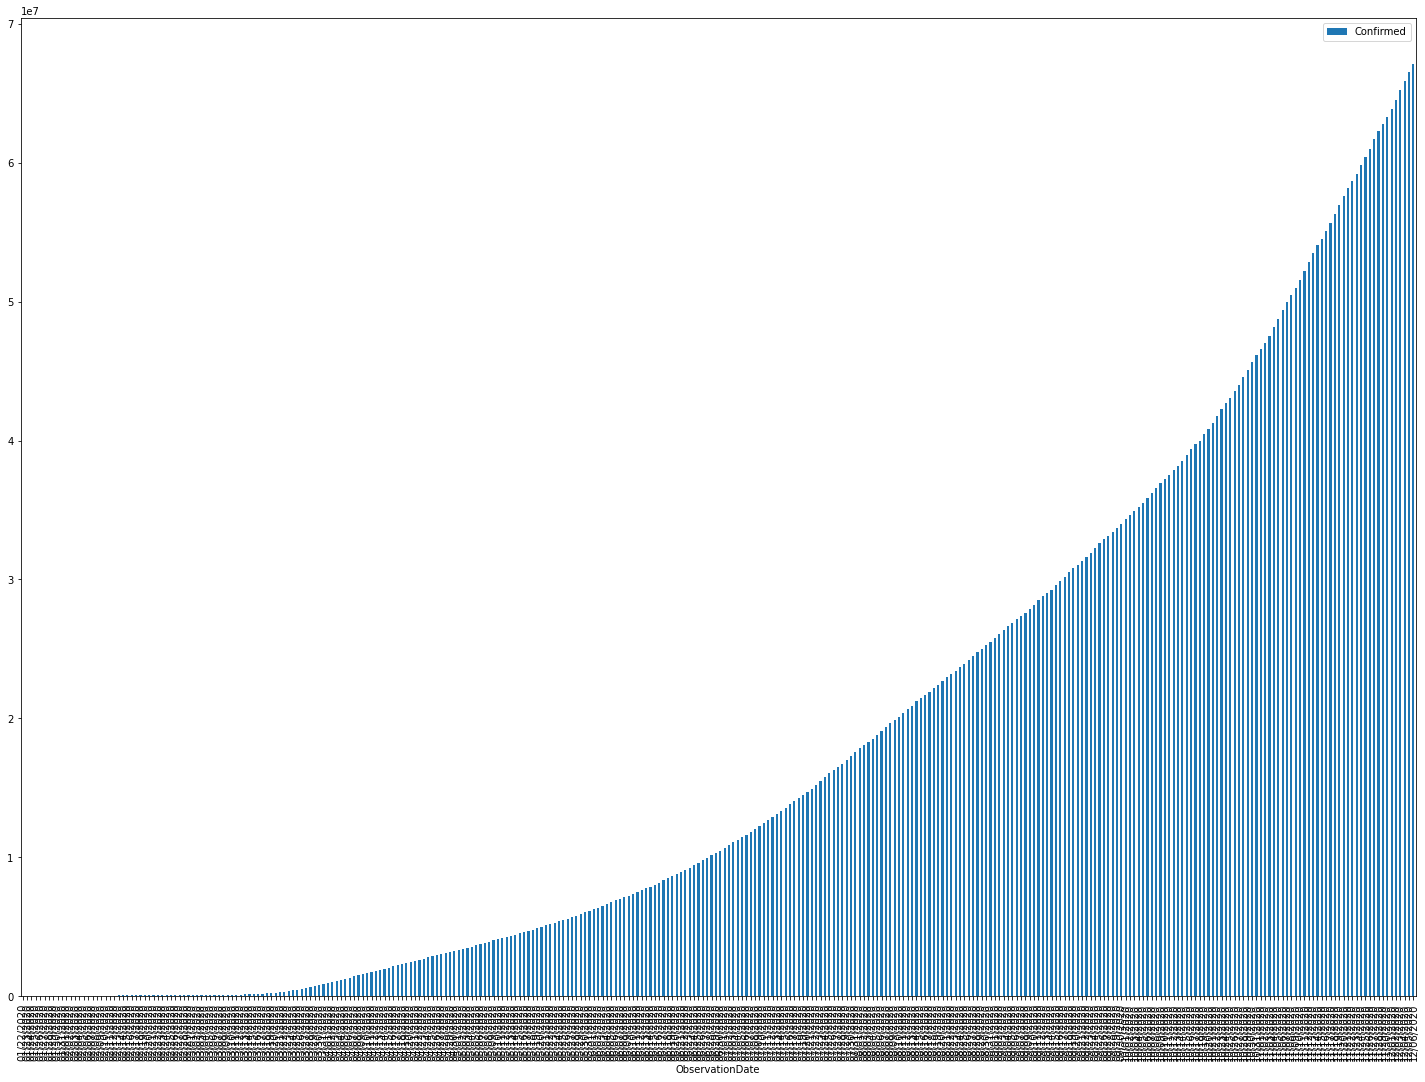

In [12]:
confirmed.plot(kind='bar',x='ObservationDate',y='Confirmed')
plt.show()

In [13]:
confirmed.iplot(kind='bar',x='ObservationDate',y='Confirmed',xTitle='ObservationDate',yTitle="Confirmed")


In [14]:
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
deaths

,ObservationDate,Deaths
0,01/22/2020,17.0
1,01/23/2020,18.0
2,01/24/2020,26.0
3,01/25/2020,42.0
4,01/26/2020,56.0
...,...,...
315,12/02/2020,1493742.0
316,12/03/2020,1506260.0
317,12/04/2020,1518670.0
318,12/05/2020,1528868.0


In [15]:
deaths.iplot(kind='bar',x='ObservationDate',y='Deaths',xTitle='ObservationDate',yTitle="Deaths")


In [16]:
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

,ObservationDate,Recovered
0,01/22/2020,28.0
1,01/23/2020,30.0
2,01/24/2020,36.0
3,01/25/2020,39.0
4,01/26/2020,52.0
...,...,...
315,12/02/2020,41496318.0
316,12/03/2020,41932091.0
317,12/04/2020,42352021.0
318,12/05/2020,42789879.0


In [17]:
recovered.iplot(kind='bar',x='ObservationDate',y='Recovered',xTitle='ObservationDate',yTitle="Recovered")


In [19]:
from prophet import Prophet


In [20]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [21]:
confirmed.tail(10)


,ObservationDate,Confirmed
310,11/27/2020,61687701.0
311,11/28/2020,62286402.0
312,11/29/2020,62773116.0
313,11/30/2020,63279026.0
314,12/01/2020,63883985.0
315,12/02/2020,64530517.0
316,12/03/2020,65221040.0
317,12/04/2020,65899441.0
318,12/05/2020,66540034.0
319,12/06/2020,67073728.0


In [22]:
deaths.tail(10)


,ObservationDate,Deaths
310,11/27/2020,1443110.0
311,11/28/2020,1452852.0
312,11/29/2020,1459771.0
313,11/30/2020,1468458.0
314,12/01/2020,1481306.0
315,12/02/2020,1493742.0
316,12/03/2020,1506260.0
317,12/04/2020,1518670.0
318,12/05/2020,1528868.0
319,12/06/2020,1536056.0


In [23]:
recovered.tail(10)


,ObservationDate,Recovered
310,11/27/2020,39476664.0
311,11/28/2020,39831868.0
312,11/29/2020,40157966.0
313,11/30/2020,40559353.0
314,12/01/2020,41034934.0
315,12/02/2020,41496318.0
316,12/03/2020,41932091.0
317,12/04/2020,42352021.0
318,12/05/2020,42789879.0
319,12/06/2020,43103827.0


In [24]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])


In [25]:
confirmed.head()


,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


In [26]:
confirmed.tail()


,ds,y
315,2020-12-02,64530517.0
316,2020-12-03,65221040.0
317,2020-12-04,65899441.0
318,2020-12-05,66540034.0
319,2020-12-06,67073728.0


In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [28]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=131)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppbtajl73/x8z9knjc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppbtajl73/oi43oi2v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97288', 'data', 'file=/tmp/tmppbtajl73/x8z9knjc.json', 'init=/tmp/tmppbtajl73/oi43oi2v.json', 'output', 'file=/tmp/tmps4ifkb84/prophet_model-20221001195454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:54:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:54:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
future.tail(10)


,ds
441,2021-04-07
442,2021-04-08
443,2021-04-09
444,2021-04-10
445,2021-04-11
446,2021-04-12
447,2021-04-13
448,2021-04-14
449,2021-04-15
450,2021-04-16


In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

,ds,yhat,yhat_lower,yhat_upper
448,2021-04-14,129869367.005,111582779.840,147671666.137
449,2021-04-15,130393288.765,112013413.181,147867192.461
450,2021-04-16,130925783.280,112303367.938,148650376.691


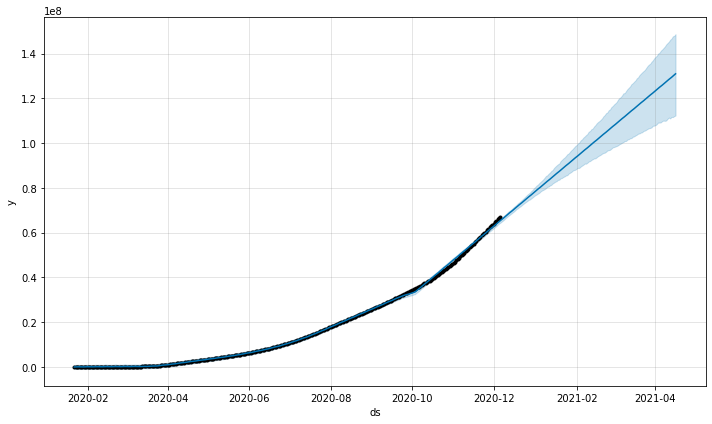

In [32]:
confirmed_forecast_plot = m.plot(forecast)


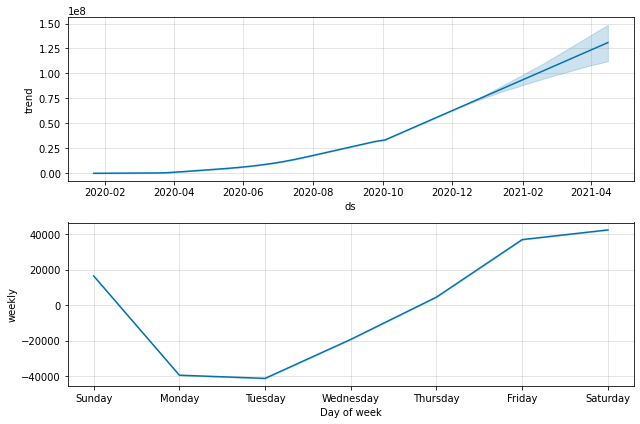

In [33]:
confirmed_forecast_plot =m.plot_components(forecast)


In [34]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [35]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppbtajl73/jgu1vzj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppbtajl73/zi9wy9xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26900', 'data', 'file=/tmp/tmppbtajl73/jgu1vzj7.json', 'init=/tmp/tmppbtajl73/zi9wy9xb.json', 'output', 'file=/tmp/tmpnyueyu_l/prophet_model-20221001195543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:55:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:55:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
446,2021-04-12
447,2021-04-13
448,2021-04-14
449,2021-04-15
450,2021-04-16


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
441,2021-04-07,2417512.087,2018432.617,2798069.914
442,2021-04-08,2425931.186,2015920.672,2803227.336
443,2021-04-09,2434225.439,2021711.834,2825426.767
444,2021-04-10,2441661.686,2021779.451,2835169.156
445,2021-04-11,2447942.872,2026632.637,2848478.176
446,2021-04-12,2453738.982,2021850.462,2863623.135
447,2021-04-13,2462001.082,2021790.380,2879592.656
448,2021-04-14,2470520.171,2027656.316,2884064.780
449,2021-04-15,2478939.270,2030173.087,2902613.348
450,2021-04-16,2487233.524,2022608.133,2905000.143


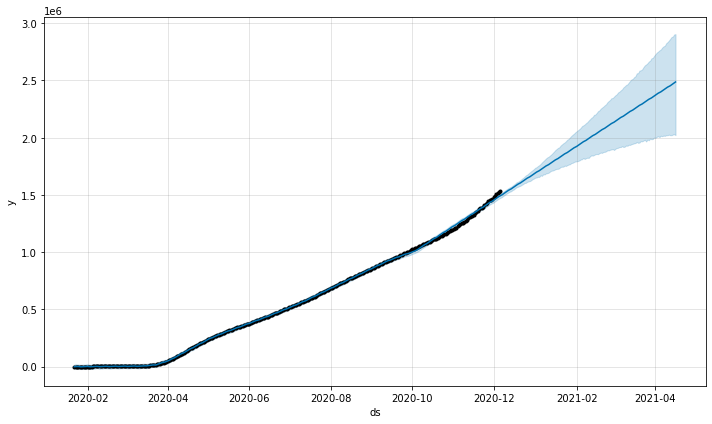

In [37]:
deaths_forecast_plot = m.plot(forecast)


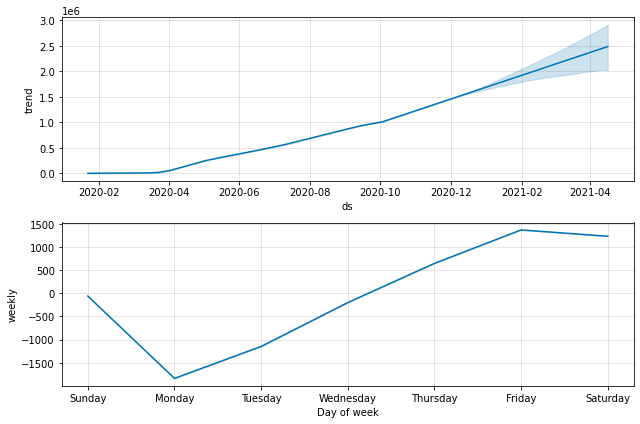

In [38]:
deaths_forecast_plot = m.plot_components(forecast)


In [39]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [40]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppbtajl73/3yb_dm31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppbtajl73/vse7lxf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4692', 'data', 'file=/tmp/tmppbtajl73/3yb_dm31.json', 'init=/tmp/tmppbtajl73/vse7lxf5.json', 'output', 'file=/tmp/tmp4xzbiq3t/prophet_model-20221001195615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:56:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:56:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
446,2021-04-12
447,2021-04-13
448,2021-04-14
449,2021-04-15
450,2021-04-16


In [41]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)

,ds,yhat,yhat_lower,yhat_upper
351,2021-01-07,50500399.727,49165261.835,51668691.099
352,2021-01-08,50768680.751,49369158.402,51953810.498
353,2021-01-09,51072035.605,49510117.110,52358002.695
354,2021-01-10,51338104.131,49765809.501,52561182.941
355,2021-01-11,51583051.726,50001530.321,52887441.216
356,2021-01-12,51878077.295,50111768.899,53186977.881
357,2021-01-13,52176637.863,50571482.126,53575601.369
358,2021-01-14,52458733.289,50671607.535,53948928.104
359,2021-01-15,52727014.314,50935329.439,54240973.168
360,2021-01-16,53030369.167,51117528.413,54587558.966


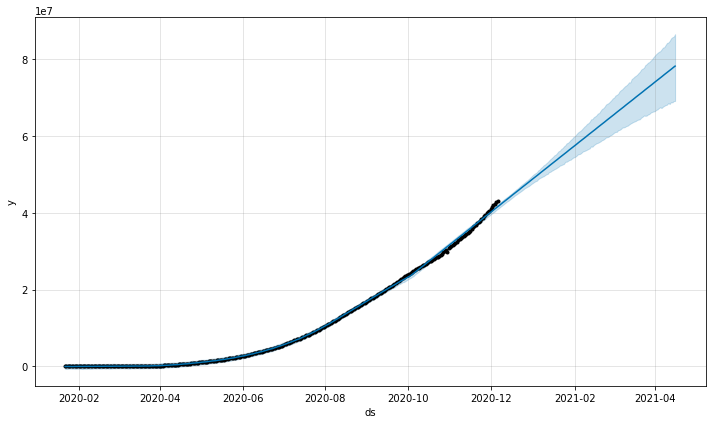

In [42]:
recovered_forecast_plot = m.plot(forecast)


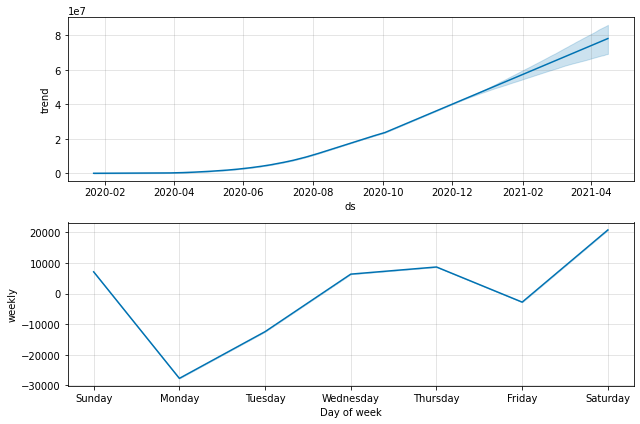

In [43]:
recovered_forecast_plot = m.plot_components(forecast)
